##  Lucas-Kanade optical flow algorithm

##  SURNAME:Rasouli Jambori  NAME: Deniz

In this lab we first go into the details of a single scale estimation and then we will use the pre-implemented algorithm (OpenCV) for a multi-resolution pyramidal version.
 
### Part1 - Single Scale LK 

In [25]:
import numpy as np
import cv2 as cv2
from scipy import signal
import matplotlib.pyplot as plt
from visualize_flow import flow_to_color
import time
%matplotlib inline


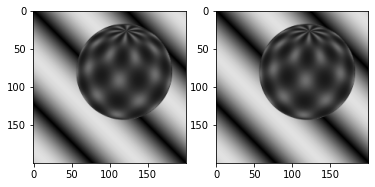

In [26]:
# we start by loading a pair of adjacent frames
#img1= cv2.imread('Data/stennis/stennis_002.ppm',cv2.IMREAD_GRAYSCALE)
#img2= cv2.imread('Data/stennis/stennis_003.ppm',cv2.IMREAD_GRAYSCALE)
img1= cv2.imread("C://Users//Pishro System///sphere///sphere.12.ppm",cv2.IMREAD_GRAYSCALE)
img2= cv2.imread("C://Users//Pishro System///sphere///sphere.14.ppm",cv2.IMREAD_GRAYSCALE)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

###  <font color="blueviolet">Analysis and Comments: <font color="navy">The Lucas-Kanade method is commonly used to calculate the Optical Flow for a sparse feature set. The main idea of this method based on a local motion constancy assumption, where nearby pixels have the same displacement direction. This assumption helps to get the approximated solution for the equation with two variables. I will write the comments within the code:

In [27]:
# this function computes the optical flow between 2 frames
# window_size controls the size of the pixel neighbourhood

def Lucas_Kanade(im1,im2,window_size,tau):
    # spatio-temporal derivative kernels
    #{to be filled by the student
    #COMMENTS:Here, u and v are the x and y components of the optical flow, im1 and im2 are two images taken at times t = 1 and t = 2 respectively,
    #and window_size is a 1 × 2 vector storing the width and height of the window used during flow computation.
    #COMMENTS:in this part we used these three kernels in order to calculate the derivatives as it's supposed to be in the below formula:
    #Ixu + Iyv + It. I think these kernels that are used, are the forward difference types and also for the time I think that 
    #An average type of filter is used.
    kernel_x = np.array([[-1., 1.], [-1., 1.]])*.25 
    kernel_y = np.array([[-1., -1.], [1., 1.]])*.25
    kernel_t = np.array([[1., 1.], [1., 1.]])*.25
    #}
    w = int(window_size/2) # window_size is odd, all the pixels with offset in between [-w, w] are inside the window
    I1g = im1 / 255. # normalize pixels
    I2g = im2 / 255. # normalize pixels
    # Implement Lucas Kanade
    # for each point, calculate I_x, I_y, I_t
    #{to be filled by the student
    #COMMENTS: We used signal.convolve2d which convolve two 2-dimensional arrays. the images that we have are two dimentional array 
    #On the other hand the kernels that we used are two dimentional matrixes (2*2 to be exact).
    #So this is the part that we have normalized the pixels and defined kernels to calculate derivate of x , and t 
    # And convolve them . Other parameters indicate that we will have symmetrical boundary conditions and
    #output will be the same size as first input which is the I1g.
    #Also we can add the convolution of the second image with the same kernel as it shown below to the first image results.
    mode = 'same'
    fx = signal.convolve2d(I1g, kernel_x, boundary='symm', mode=mode)# + signal.convolve2d(I2g, kernel_x, boundary='symm', mode=mode)
    fy = signal.convolve2d(I1g, kernel_y, boundary='symm', mode=mode)# + signal.convolve2d(I2g, kernel_y, boundary='symm', mode=mode) 
    ft = signal.convolve2d(I1g, kernel_t, boundary='symm', mode=mode) +signal.convolve2d(I2g, -kernel_t, boundary='symm', mode=mode)
    #}
    #COMMENT:these are our unknowns. the change that we have according to the x and y axis.So because we want to multiply these
    #with the Ix and Iy, we used np.zeros to creat  a new array of the same shape with Ig1 and with the same type, filled with zeros.
    u = np.zeros(I1g.shape)
    v = np.zeros(I1g.shape)
    # within window window_size * window_size
    #What we do in this part is something similar to what we do in the padding. We defines these relation as the starting point of
    # our algorithm covers that first pixel inside the window. So in some how we are avoiding the loss of borders to contain all the pixels.
    #In short we enlarging our windows and then flatten them.
    for i in range(w, I1g.shape[0]-w):
        for j in range(w, I1g.shape[1]-w):
            #{To Be filled by the student with a hint on pinv
            Ix = fx[i-w:i+w+1, j-w:j+w+1].flatten()
            Iy = fy[i-w:i+w+1, j-w:j+w+1].flatten()
            It = np.array(ft[i-w:i+w+1, j-w:j+w+1].flatten())
  #COMMENTS: In order to solve the equation Au=b we should solve u=A -1 * b. u here is the vector of changes for both x and y axis.
  # 
            A = np.transpose(np.array([Ix ,Iy]))
            b = -It
            #COMMENTS: Here we are checking if the A matrix has rank 2 or not. we will check if the minimum absolute value of the
            # eigval of the A.T*A matrix is greater than a treshold tau or not. a theshold τ should be added, such that if τ is larger than
            #the smallest eigenvalue of A’A, then the the optical flow at that position should not be computed.
            #Recall that the optical flow is only valid in regions where has rank 2, which is what the threshold is checking. 
            

           
            if np.min(abs(np.linalg.eigvals(np.matmul(A.T, A)))) >= tau: 
                # COMMENTS: Here if the above condition is valid we can calculate the pseudo-inverse of a A matrix and multiply it
                # with b in order to fing the values of u vector which contain the changes in x and y axis.
                nu = np.matmul(np.linalg.pinv(A), b)  
                u[i,j]=nu[0]
                v[i,j]=nu[1]
       #}

    return (u,v) #two components of the optical flow

Call the previously defined method

In [28]:
start = time.time()
[u,v] = Lucas_Kanade(img1,img2,3,0.00001)
print("Elapsed time is %d"%(time.time()-start))

Elapsed time is 2


Let's visualize the results of the flow field

(200, 200)
(200, 200)


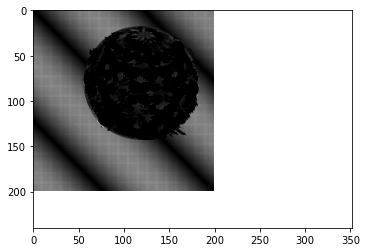

In [29]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
print(u.shape)
print(v.shape)
xaxis = list(np.arange(img1.shape[0]))
yaxis = list(np.arange(img1.shape[1]))
plt.xlim(0, 352)
plt.ylim(240,0)
plt.quiver(u,v)

In [30]:
#plt.quiver??

We may also visualize the flow field using a color-coding algorithm ( See https://github.com/tomrunia/OpticalFlow_Visualization)

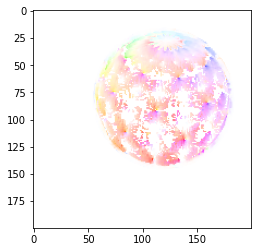

In [31]:
flow = np.stack([u,v],axis=2)
flow_color = flow_to_color(flow, convert_to_bgr=False)
plt.imshow(flow_color)

In [32]:
start = time.time()
[u,v] = Lucas_Kanade(img1,img2,7,0.00001)
print("Elapsed time is %d"%(time.time()-start))

Elapsed time is 2


(200, 200)
(200, 200)


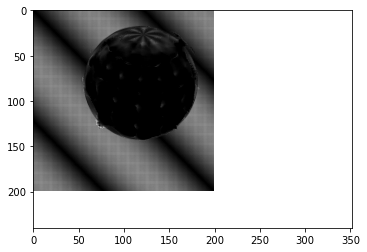

In [33]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
print(u.shape)
print(v.shape)
xaxis = list(np.arange(img1.shape[0]))
yaxis = list(np.arange(img1.shape[1]))
plt.xlim(0, 352)
plt.ylim(240,0)
plt.quiver(u,v)

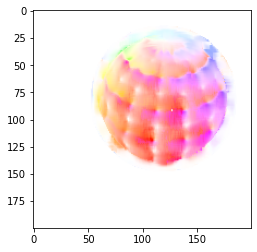

In [34]:
flow = np.stack([u,v],axis=2)
flow_color = flow_to_color(flow, convert_to_bgr=False)
plt.imshow(flow_color)

In [35]:
start = time.time()
[u,v] = Lucas_Kanade(img1,img2,11,0.00001)
print("Elapsed time is %d"%(time.time()-start))

Elapsed time is 3


(200, 200)
(200, 200)


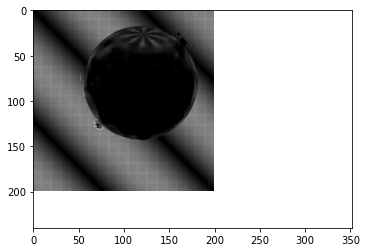

In [36]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
print(u.shape)
print(v.shape)
xaxis = list(np.arange(img1.shape[0]))
yaxis = list(np.arange(img1.shape[1]))
plt.xlim(0, 352)
plt.ylim(240,0)
plt.quiver(u,v)

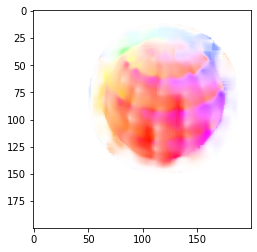

In [37]:
flow = np.stack([u,v],axis=2)
flow_color = flow_to_color(flow, convert_to_bgr=False)
plt.imshow(flow_color)

## Try different window size and thresholds tau

### <font color="blueviolet">Increasing the window size: <font color="navy"> As it can be seen when we increase the size of window from3 to 7 and to 11, the color map of the flow will become more vivid and colorful. Maybe this indicate that as we consider bigger neighboorhood for our movement, the result of flow will be illustrating a higher amount of movement in the shape of color map.

### <font color="blueviolet">Changing the tau treshold: <font color="navy"> As it can be seen from below images, when we incrase the tau value, the less points will be considered in the color flow map.This shows that for higher values of tau, when the treshold chacking the rank, due to the eig values of the computed matrix, some points are not valid with the given condition so we will not calculate the optical flow of them.

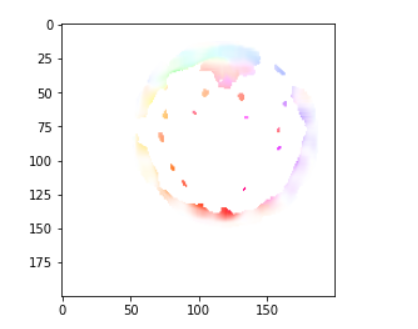

###  <center><font color="navy"> tau=0.005

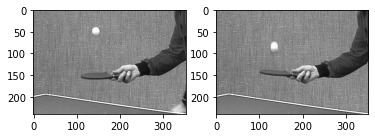

In [53]:
# we start by loading a pair of adjacent frames
#img1= cv2.imread('Data/stennis/stennis_002.ppm',cv2.IMREAD_GRAYSCALE)
#img2= cv2.imread('Data/stennis/stennis_003.ppm',cv2.IMREAD_GRAYSCALE)
img1= cv2.imread("C://Users//Pishro System///stennis_003.ppm",cv2.IMREAD_GRAYSCALE)
img2= cv2.imread("C://Users//Pishro System///stennis_014.ppm",cv2.IMREAD_GRAYSCALE)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [72]:
start = time.time()
[u,v] = Lucas_Kanade(img1,img2,21,0.0001)
print("Elapsed time is %d"%(time.time()-start))

Elapsed time is 14


(240, 352)
(240, 352)


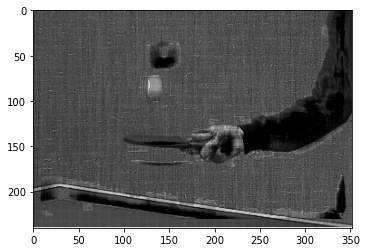

In [73]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
print(u.shape)
print(v.shape)
xaxis = list(np.arange(img1.shape[0]))
yaxis = list(np.arange(img1.shape[1]))
plt.xlim(0, 352)
plt.ylim(240,0)
plt.quiver(u,v)

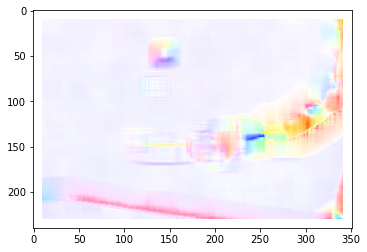

In [74]:
flow = np.stack([u,v],axis=2)
flow_color = flow_to_color(flow, convert_to_bgr=False)
plt.imshow(flow_color)

## Try both sphere and tennis datasets

### <font color="navy"> This is the usage of two images from the other dataset. As it can be seen the results are almost similar to the sphere data.But for this dataset, as I used two frames that are a little bit more different from each other in comparison with sphere image pairs, the time that it took to run the model was longer.


###   Analysis:

 

- Comment each line of code within the Lucas-Kanade function, in particular 
<tt> np.min(abs(np.linalg.eigvals(np.matmul(A.T, A)))) >= tau: </tt>

 

Experiments:
- Try different window size and thresholds tau 
    
- Try different frames (also introducing some temporal gap between them)  
- Try both sphere and tennis datasets
- What do you observe ? Do you see any specific limits in the very simple LK method?

 
## What do you observe ? Do you see any specific limits in the very simple LK method?
 ### <font color="navy">As can be seen, the algorithm performs best if the motion of the moving object(s) in between consecutive frames is slow.if the motion is large, the algorithm fails and we should use multiple-scale version Lucas-Kanade with image pyramids.
### <font color="navy">Finally,  with small window size,  the algorithm captures subtle motions but not large motions. With large size it happens the other way.

### Optional Part2 - Pyramidal LK
Now let's take a look at the implementation provided in OpenCV of a pyramid Lucas-Kanade Sparse optical flow

The algorithm evaluates optical flow on sparse points (corners) in order to avoid the ill-posed inversion of A'A.
Additionally, Optical flow is calculated and combined on different scales to handle large-displacement

In [16]:
#parameters of the corner detection procedure
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.1,
                       minDistance = 7,
                       blockSize = 7 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))


1- Call the function that detects the key-points (Shi-Tomasi corners) from the first frame 
2- Call LK Flow algorithm which returns the positions of these key points in the second frame

In [17]:
p0 = cv2.goodFeaturesToTrack(img1, mask = None, **feature_params)
p1, st, err = cv2.calcOpticalFlowPyrLK(img1, img2, p0, None, **lk_params)

Draw vectors to connect points from the first frame and the second frame to visualize the motion vectors

(21, 2)


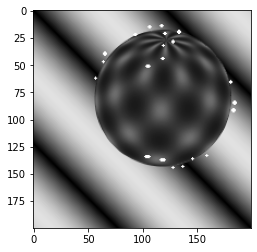

In [19]:
good_new = p1[st==1]
good_old = p0[st==1]
mask = np.zeros_like(img1)
print(good_old.shape)
for i,(new,old) in enumerate(zip(p1,p0)):
    a,b = new.ravel()
    
    c,d = old.ravel()
    mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), [255,255,0], 2)
img2 = cv2.add(img2,mask)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
